<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# Lab: Matplotlib **Evolução**

Aprimore aqui como empregar o modo `artist layer` e como empregar gráficos de linha para acompanhar a tendência ou evolução dos dados.

<br>

Referências e Materiais úteis para este Lab:

- Oliveira, R. (2022). [Visualizacao de Dados em Python](https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python) ISBN: 978-65-5545-511-3. [Editora Mackenzie](https://www.mackenzie.br/editora/livro/n/a/i/visualizacao-de-dados-com-python), [Amazon](https://www.amazon.com.br/VISUALIZA%C3%87%C3%83O-DADOS-PYTHON-ROGERIO-OLIVEIRA/dp/655545511X) ou [Martins Fontes](https://www.martinsfontespaulista.com.br/visualizacao-de-dados-com-python-997336/p)
<p>
  <img src="https://github.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/raw/main/figuras/capas/1.png" width="30%" align="left"/>
</p>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

* Capítulo [Gráficos com Matplotlib](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c2_parte_1.html)

* Capítulo [Evolução](http://meusite.mackenzie.br/rogerio/MyBook/_build/html/c3_parte_1.html)

* https://matplotlib.org/

* https://matplotlib.org/stable/tutorials/index.html

* https://matplotlib.org/stable/gallery/index.html


---



# Basic imports

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns


# **CASE: fmri**

Nos exercícios a seguir partimos da seguinte base de dados:

In [54]:
df = sns.load_dataset('fmri')
df = df.sort_values('timepoint')
df.head()

,subject,timepoint,event,region,signal
1063,s0,0,cue,parietal,-0.006899
258,s7,0,stim,parietal,0.004081
259,s6,0,stim,parietal,-0.023319
260,s5,0,stim,parietal,-0.051228
865,s5,0,cue,frontal,-0.027033


In [55]:
#@markdown This cell is configured to not execute. Do not change this.
%%script echo skipping
df = df.sort_values('timepoint')
df.head()

np.random.seed(1)
r = np.random.randint(0,len(df.subject.unique())+1,len(df.subject.unique()))
s = np.sort( df.subject.unique() )
r = s[r]

for i in range(len(s)):
  df.subject = df.subject.replace(r[i],'x')
  df.subject = df.subject.replace(s[i],r[i])
  df.subject = df.subject.replace('x',s[i])

df.to_csv('fmri.csv',index=None)

df = pd.read_csv('fmri.csv')
df.head()


skipping


# Pré Exercício Iterando no `ax[i,j]`

Veja aqui formas diferentes de empregar o vetor `ax`.

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

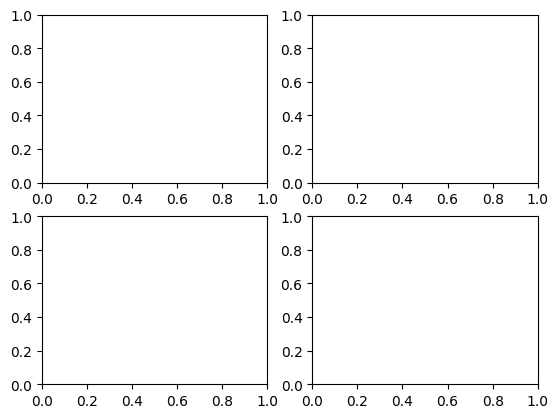

In [56]:
fig, ax = plt.subplots(2,2)
ax

In [57]:
ax.reshape(-1)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [58]:
( ax1, ax2 ) = ax 
ax1

array([<Axes: >, <Axes: >], dtype=object)

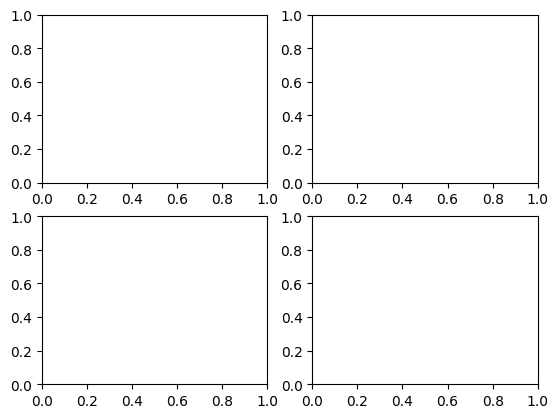

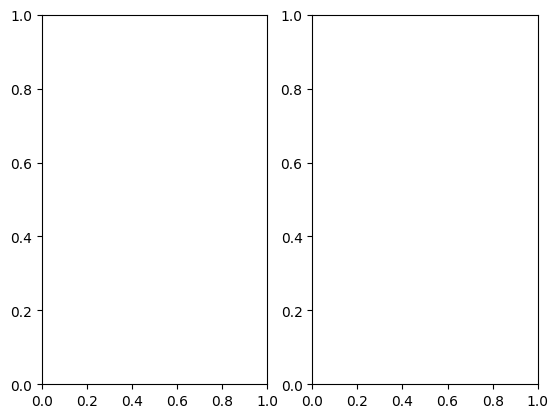

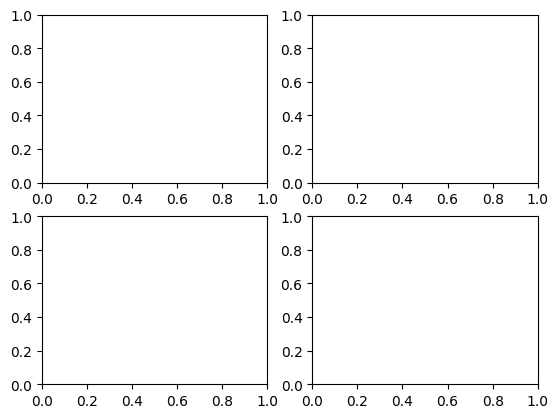

In [59]:
# using the variable axs for multiple Axes
fig, axs = plt.subplots(2, 2)

# using tuple unpacking for multiple Axes
fig, (ax1, ax2) = plt.subplots(1, 2)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# Exercício 1  

Use algumas das formas acima para, partindo do último exercício da lista anterior, produzir um gráfico como abaixo para os sujeitos `s0` a `s8`, empregando o modo `artist layer` e **iterando sobre os elementos de `ax`**. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_1.png)

Q. Você pode concluir que todos os sinais, de estímulos e repouso, têm aproximadamente o mesmo comportamento para todos os sujeitos? 

In [60]:
df = df.sort_values(by='timepoint')

In [61]:
def return_stim_cue_y_from_subject(subject):
  region_mask = df['region'] == 'parietal'
  stim_mask = df['event'] == 'stim'
  cue_mask = df['event'] == 'cue'

  subject_mask = df['subject'] == subject

  temp = df[(subject_mask) & (region_mask)]
  stim = temp[stim_mask]
  cue = temp[cue_mask]

  return stim, cue

<ipython-input-61-f2e113af87dc>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stim = temp[stim_mask]
<ipython-input-61-f2e113af87dc>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cue = temp[cue_mask]


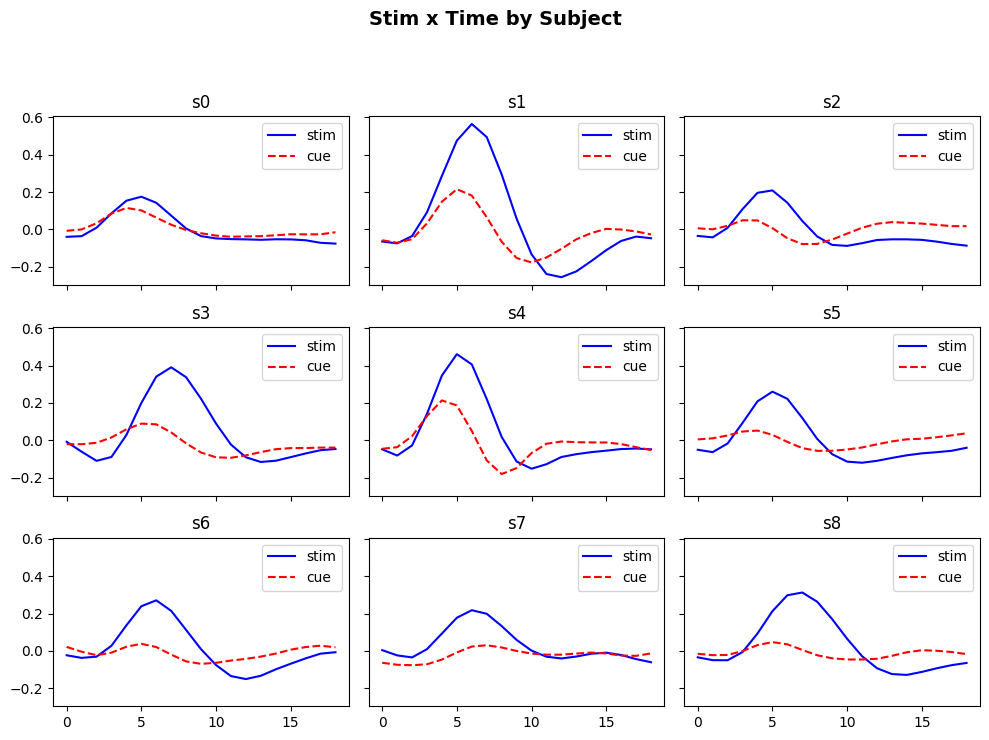

In [62]:
fig, ax = plt.subplots(3, 3, figsize=(10,7), sharex=True, sharey=True)
plt.suptitle('Stim x Time by Subject', fontsize=14, weight='bold', y=1.05)

for i in range(9):
    subject = 's'+ str(i)
    stim, cue = return_stim_cue_y_from_subject(subject)

    axr = ax.reshape(-1)

    axr[i].plot(stim['timepoint'], stim['signal'], 'b', label ='stim')
    axr[i].plot(cue['timepoint'], cue['signal'], '--r', label='cue')

    axr[i].set_title(subject)
    axr[i].legend()

plt.tight_layout()
plt.show()


# Exercício 2 

Acima você observou 9 sujeitos com o comportamento mais ou menos semelhante tanto nas situações de estímulo como repouso. Mas você pode fazer melhor e empregar toda a base para comparar os sinais com o sinal médio de todos os sujeitos. Faça isso neste exercício produzindo um gráfico como abaixo. Observe todos os demais elementos do gráfico.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_2.png)

Q. Quais sujeitos mais se assemelham e quais mais se distanciam do comportamento médio? 

In [63]:
region_mask = df['region'] == 'parietal'
stim_mask = df['event'] == 'stim'
cue_mask = df['event'] == 'cue'

temp = df[region_mask]
stim = temp[stim_mask]
cue = temp[cue_mask]

stim_mean = stim.groupby('timepoint').mean()
stim_mean['timepoint'] = stim_mean.index
cue_mean = cue.groupby('timepoint').mean()
cue_mean['timepoint'] = cue_mean.index

<ipython-input-63-214dbf3d83bf>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stim = temp[stim_mask]
<ipython-input-63-214dbf3d83bf>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cue = temp[cue_mask]


<ipython-input-61-f2e113af87dc>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stim = temp[stim_mask]
<ipython-input-61-f2e113af87dc>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cue = temp[cue_mask]


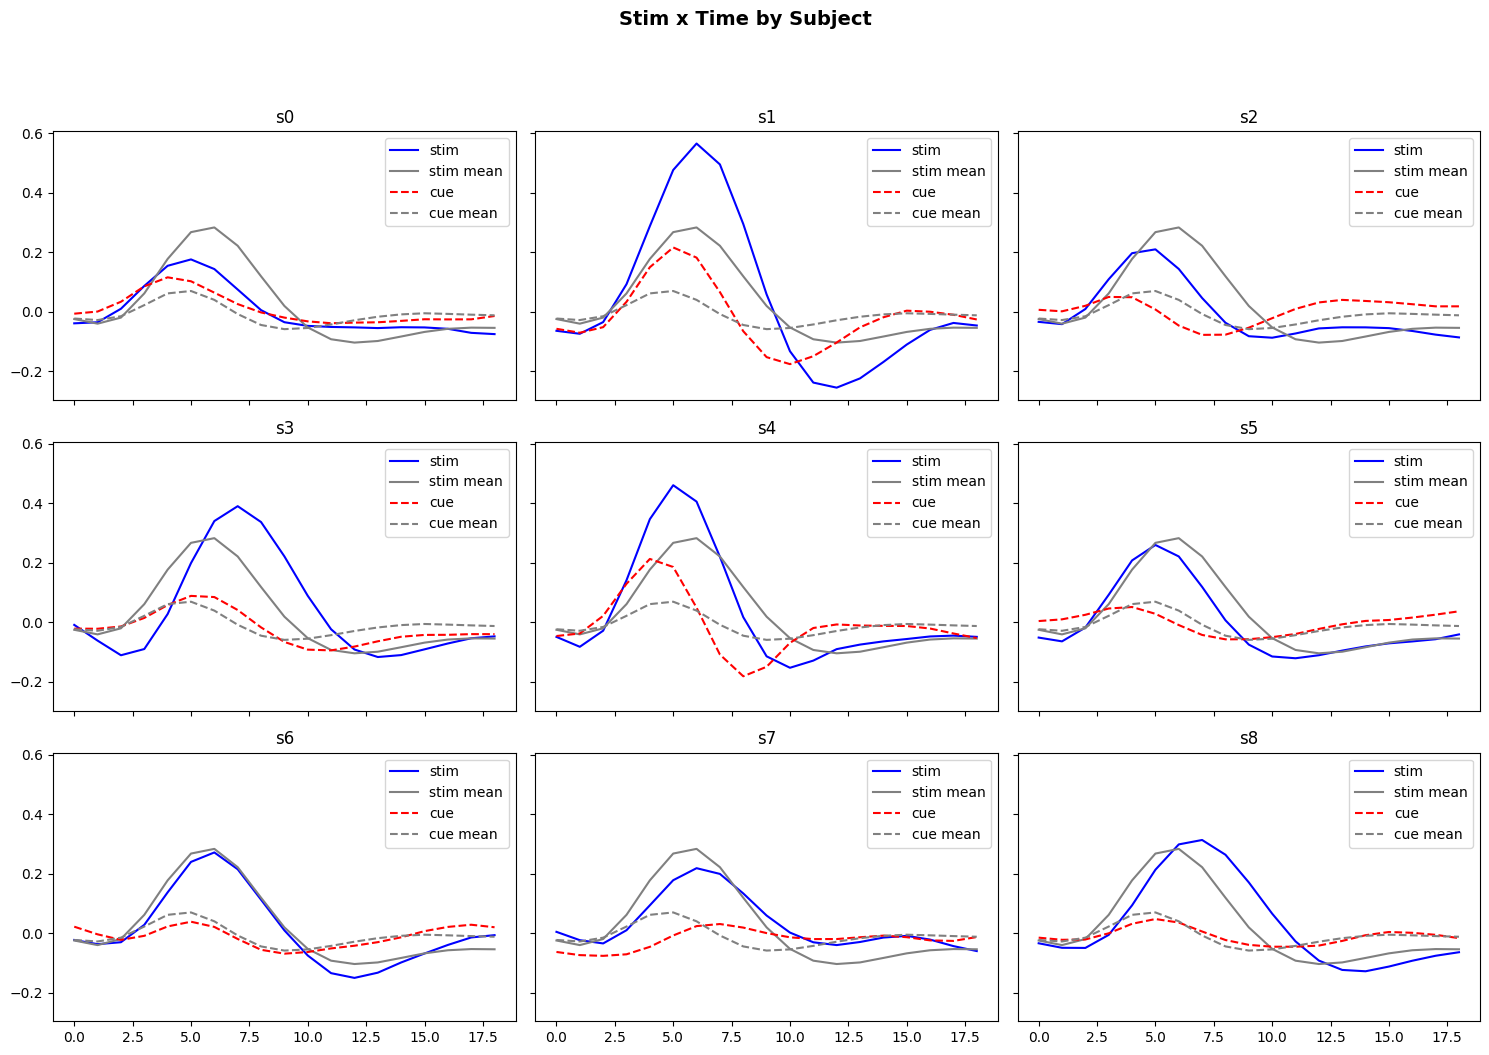

In [64]:
fig, ax = plt.subplots(3, 3, figsize=(15,10), sharex=True, sharey=True)
plt.suptitle('Stim x Time by Subject', fontsize=14, weight='bold', y=1.05)

for i in range(9):
    subject = 's'+ str(i)
    stim, cue = return_stim_cue_y_from_subject(subject)

    axr = ax.reshape(-1)

    axr[i].set_title(subject)

    axr[i].plot(stim['timepoint'], stim['signal'], 'b', label ='stim')
    axr[i].plot(stim_mean['timepoint'], stim_mean['signal'], 'gray', label ='stim mean')

    axr[i].plot(cue['timepoint'], cue['signal'], '--r', label='cue')
    axr[i].plot(cue_mean['timepoint'], cue_mean['signal'], color='gray', linestyle='dashed', label='cue mean')

    axr[i].legend()

plt.tight_layout()
plt.show()

# **CASE: Yahoo Finance**

Nos exercícios a seguir partimos da seguinte base de dados extraída do `yahoo finance`:

<small>
Para consulta de ativos no Yahoo Finance, pesquise em: https://ca.finance.yahoo.com/lookup

In [65]:
%%capture
!pip install yfinance

In [66]:
import yfinance as yf

data = yf.download(['^BVSP', 'PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BRL=X'],'2018-10-01','2022-03-01')

df = data['Adj Close'].reset_index()
df.head()

[*********************100%***********************]  5 of 5 completed


,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP
0,2018-10-01,4.0527,24.636940,9.295506,42.865036,78624.0
1,2018-10-02,4.0164,25.585819,10.101116,43.432781,81612.0
2,2018-10-03,3.9395,26.743671,10.530481,42.545673,83273.0
3,2018-10-04,3.9004,26.771910,10.632288,41.729534,82953.0
4,2018-10-05,3.8739,26.681547,10.605732,40.799847,82322.0


In [67]:
#@markdown This cell is configured to not execute. Do not change this.
%%script echo skipping
np.random.seed(1)

data2 = yf.download(['MGLU3.SA', 'LREN3.SA', 'BRAP3.SA', 'BTC-USD'],'2018-10-01','2022-03-01')

df2 = data2['Adj Close'].reset_index()

df[['ITUB4.SA', 'PETR4.SA', 'VALE3.SA', '^BVSP']] = df2[['MGLU3.SA', 'LREN3.SA', 'BRAP3.SA', 'BTC-USD']] 

# df.head()

skipping


# Pré Exercício

Os valores estão em reais. Crie para cada ticket de ação o valor em USD criando um novo atributo `<ticket>_USD`. Em seguida empregue a função `pd.to_datetime()` para converter o formato de Date.

In [68]:
df['ITUB4.SA'+'_USD'] = df['ITUB4.SA'] / df['BRL=X']
df['PETR4.SA'+'_USD'] = df['PETR4.SA'] / df['BRL=X']
df['VALE3.SA'+'_USD'] = df['VALE3.SA'] / df['BRL=X']

df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,BRL=X,ITUB4.SA,PETR4.SA,VALE3.SA,^BVSP,ITUB4.SA_USD,PETR4.SA_USD,VALE3.SA_USD
0,2018-10-01,4.0527,24.636940,9.295506,42.865036,78624.0,6.079142,2.293658,10.576908
1,2018-10-02,4.0164,25.585819,10.101116,43.432781,81612.0,6.370337,2.514968,10.813859
2,2018-10-03,3.9395,26.743671,10.530481,42.545673,83273.0,6.788595,2.673050,10.799765
3,2018-10-04,3.9004,26.771910,10.632288,41.729534,82953.0,6.863888,2.725948,10.698783
4,2018-10-05,3.8739,26.681547,10.605732,40.799847,82322.0,6.887516,2.737740,10.531983


In [69]:
#@markdown Must be True
((df.shape[1] == 9) and (df.Date.dtype == '<M8[ns]'))

True

# Exercício 3

Produza um gráfico como abaixo.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_3.png)

Note que o eixo y é compartilhado. Depois de fazer uma primeira versão do seu gráfico você pode achar interessante consultar https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib para ver alternativas de como ajustar as escalas do eixo `x`. 

Q. Qual ação teve maiores valores absolutos no período? 

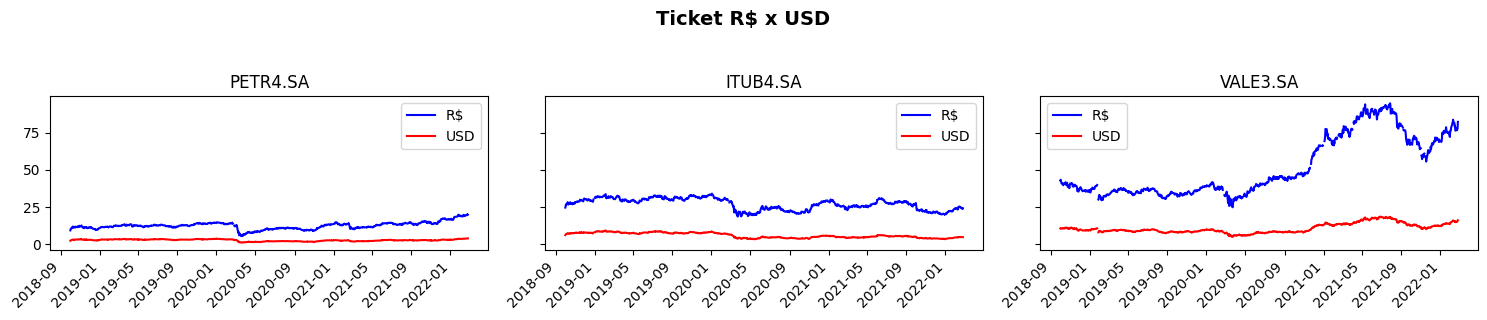

In [81]:
fig, ax = plt.subplots(1, 3, figsize=(15,3), sharex=True, sharey=True)

plt.suptitle('Ticket R$ x USD', fontsize=14, weight='bold', y=1.05)

tickets = pd.Series(['PETR4.SA', 'ITUB4.SA', 'VALE3.SA'])
tickets_usd = tickets.apply(lambda x : x+'_USD')

for i in range(3):

  ax[i].set_title(tickets[i])

  ax[i].plot(df['Date'], df[tickets[i]], color='b', label='R$')
  ax[i].plot(df['Date'], df[tickets_usd[i]], color='r', label='USD')
  ax[i].legend()

fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()


# Exercício 4

Produza um gráfico como abaixo.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_4.png)

Basicamente, agora, você vai empregar duas escalas para o eixo y para representar valores em reais e em dólar.

Q. Para empregar dois eixos y compartilhados...


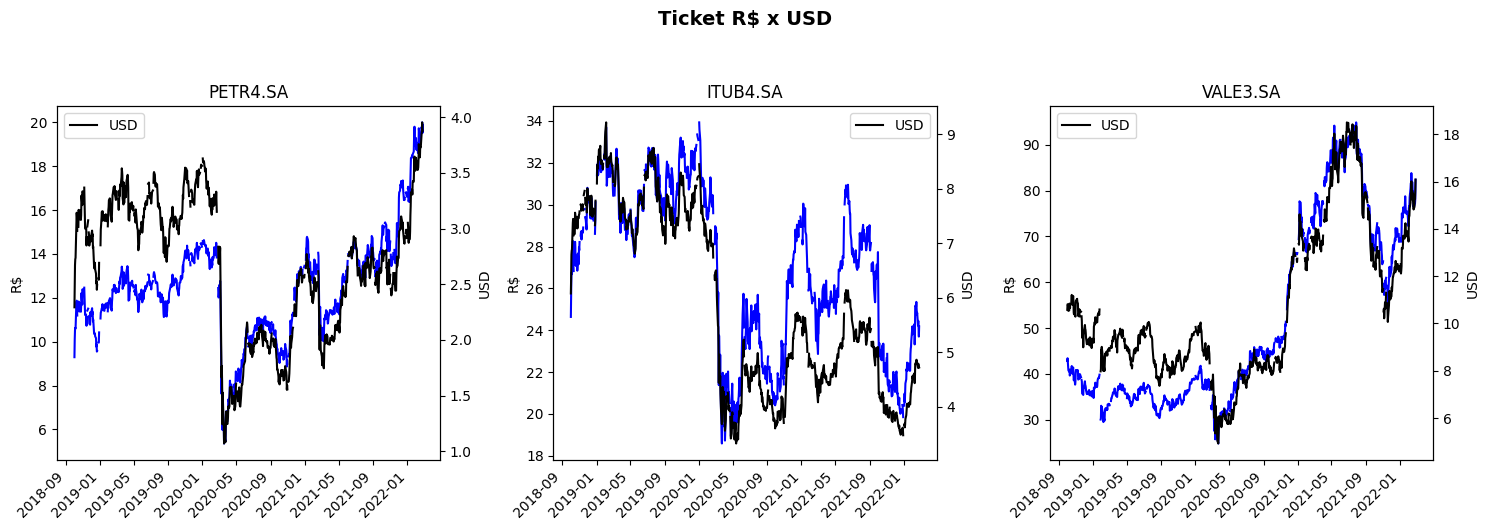

In [86]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharex=True)
plt.suptitle('Ticket R$ x USD', fontsize=14, weight='bold', y=1.05)

tickets = pd.Series(['PETR4.SA', 'ITUB4.SA', 'VALE3.SA'])
tickets_usd = tickets.apply(lambda x : x+'_USD')

for i in range(3):

  ax[i].set_title(tickets[i])
  ax1 = ax[i].twinx()

  ax[i].set_ylabel('R$')
  ax1.set_ylabel('USD')

  ax[i].plot(df['Date'], df[tickets[i]], color='b')
  ax1.plot(df['Date'], df[tickets_usd[i]], color='black', label='USD')
  ax1.legend()

fig.autofmt_xdate(rotation=45)
plt.tight_layout()
plt.show()

# Exercício 5

Produza um gráfico como abaixo.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_5.png)

O primeiro eixo y apresenta valores em dólar dos ativos e o segundo eixo y os pontos do ibovespa. 

Dica: use `legend(loc=...)`

Q. Qual ativo teve uma recuperação mais rápida do seu valor após a maior desvalorização no período observado? 


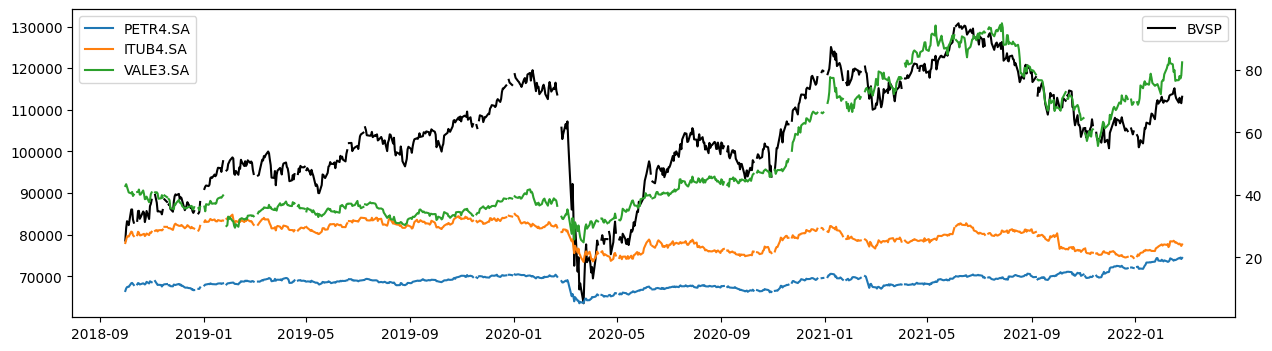

In [96]:
tickers = pd.Series(['PETR4.SA', 'ITUB4.SA', 'VALE3.SA'])

fig0, ax0 = plt.subplots(figsize=(15,4))
ax1 = ax0.twinx()

ax0.plot(df['Date'], df['^BVSP'], label='BVSP', color='black')
ax0.legend(loc=1)


for ticker in tickers:
  ax1.plot(df['Date'], df[ticker], label=ticker)

ax1.legend()
plt.show()

# Exercício 6

Produza um gráfico como abaixo buscando uma função do `Pandas` para substituir os valores ausentes por valores médios entre os pontos.

![imagem](https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/images/ex_matplotlib2_6.png)

Adicione ainda uma linha vertical e um rótulo (texto) no ponto que o valor das ações indica o impacto da primeira onda de Covid no mercado brasileiro.

Dica: use `legend(loc=...)`

Q. Qual é a função do `Pandas` que substitui os valores ausentes por valores médios entre os pontos e qual ativo teve o maior ponto de desvalorização no gráfico anterior mais *suavizado*?